# Analysis of Australia's Electricity Production from renewable resources as a ratio of Total Electricity Production (excluding Hydro electric) between the years of 1960 and 2015

In [1]:
# import libraries that are required to complete one series analysis
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# load the meta data into a data frame
wb_metadata_df = pd.read_csv(Path('../data/WB_METADATA.csv'),index_col='series_id')

# load each country in its own data frame
wb_data_aus_df = pd.read_csv(Path('../data/WB_DATA_AUS.csv'),index_col='series_id')

In [3]:
# verify metadata has been read
wb_metadata_df.head()

,name,description
series_id,,
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...
AG.LND.AGRI.ZS,Agricultural land (% of land area),Agricultural land refers to the share of land ...
AG.LND.AGRI.K2,Agricultural land (sq. km),Agricultural land refers to the share of land ...
SH.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...
DC.DAC.CANL.CD,"Net bilateral aid flows from DAC donors, Canad...",Net bilateral aid flows from DAC donors are th...


In [4]:
# verify that country data has been read
wb_data_aus_df.head()

,country_code,country_name,year,value
series_id,,,,
NV.AGR.TOTL.ZS,AUS,Australia,1990,4.194135
NV.AGR.TOTL.ZS,AUS,Australia,1991,3.171618
NV.AGR.TOTL.ZS,AUS,Australia,1992,3.043311
NV.AGR.TOTL.ZS,AUS,Australia,1993,3.253233
NV.AGR.TOTL.ZS,AUS,Australia,1994,3.338470


In [5]:
# join the dataframes using the pd.merge function
wb_data_aus_mereged_df = pd.merge(wb_metadata_df,wb_data_aus_df, how='inner', on='series_id').dropna()

In [6]:
# check if there are any blank values in the columns
wb_data_aus_mereged_df.isnull().sum()

name            0
description     0
country_code    0
country_name    0
year            0
value           0
dtype: int64

In [7]:
# review if the data has been merged correct
wb_data_aus_mereged_df.head()

,name,description,country_code,country_name,year,value
series_id,,,,,,
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...,AUS,Australia,2019,0.539345
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...,AUS,Australia,2020,0.427517
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...,AUS,Australia,2017,0.603490
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...,AUS,Australia,2018,0.640299
AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,Agricultural irrigated land refers to agricult...,AUS,Australia,2001,0.549923


In [8]:
# drop description column from the data
wb_data_aus_mereged_df = wb_data_aus_mereged_df.drop(columns=['description'])

In [9]:
# get the name of the series from the metadata dataframe
display(wb_metadata_df.loc['EG.ELC.RNWX.ZS','name'])
display(wb_metadata_df.loc['EG.ELC.RNWX.KH','name'])

'Electricity production from renewable sources, excluding hydroelectric (% of total)'

'Electricity production from renewable sources, excluding hydroelectric (kWh)'

In [10]:
# store the name associated with the series into a variable, to be used as titles on the plots
plot_title_percent = wb_metadata_df.loc['EG.ELC.RNWX.ZS','name']
plot_title_kWh = wb_metadata_df.loc['EG.ELC.RNWX.KH','name']

In [11]:
# extract the data from the merged dataframe to use the rows from the series that are being analyzed
wb_aus_elec_zs_df = wb_data_aus_mereged_df[wb_data_aus_mereged_df.index == 'EG.ELC.RNWX.ZS'].sort_values(by='year')
wb_aus_elec_kh_df = wb_data_aus_mereged_df[wb_data_aus_mereged_df.index == 'EG.ELC.RNWX.KH'].sort_values(by='year')

In [12]:
# verify filter on percent dataframe
wb_aus_elec_zs_df.head()

,name,country_code,country_name,year,value
series_id,,,,,
EG.ELC.RNWX.ZS,"Electricity production from renewable sources,...",AUS,Australia,1960,1.412653
EG.ELC.RNWX.ZS,"Electricity production from renewable sources,...",AUS,Australia,1961,1.314078
EG.ELC.RNWX.ZS,"Electricity production from renewable sources,...",AUS,Australia,1962,1.201678
EG.ELC.RNWX.ZS,"Electricity production from renewable sources,...",AUS,Australia,1963,1.099102
EG.ELC.RNWX.ZS,"Electricity production from renewable sources,...",AUS,Australia,1964,0.949846


In [13]:
# verify filter on kWh dataframe
wb_aus_elec_kh_df.head()

,name,country_code,country_name,year,value
series_id,,,,,
EG.ELC.RNWX.KH,"Electricity production from renewable sources,...",AUS,Australia,1960,303000000.0
EG.ELC.RNWX.KH,"Electricity production from renewable sources,...",AUS,Australia,1961,303000000.0
EG.ELC.RNWX.KH,"Electricity production from renewable sources,...",AUS,Australia,1962,295000000.0
EG.ELC.RNWX.KH,"Electricity production from renewable sources,...",AUS,Australia,1963,301000000.0
EG.ELC.RNWX.KH,"Electricity production from renewable sources,...",AUS,Australia,1964,289000000.0


<AxesSubplot:title={'center':'Electricity production from renewable sources, excluding hydroelectric (% of total)'}, xlabel='year', ylabel='% of Total Electricity'>

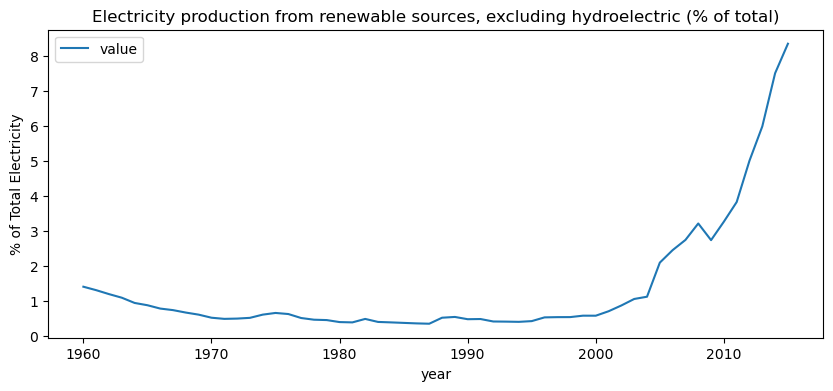

In [14]:
# plot the data over the years. the visual may provide additional areas of focus
wb_aus_elec_zs_df.plot(x='year',y='value',  title=plot_title_percent,ylabel='% of Total Electricity',figsize=(10,4),legend=True)

<AxesSubplot:title={'center':'Electricity production from renewable sources, excluding hydroelectric (kWh)'}, xlabel='year', ylabel='Kilowatt Hours'>

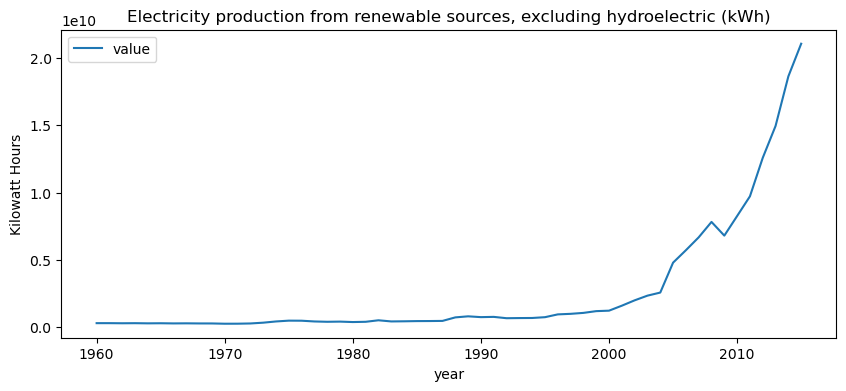

In [15]:
# plot the data over the years. the visual may provide additional areas of focus
wb_aus_elec_kh_df.plot(x='year',y='value',title=plot_title_kWh,ylabel='Kilowatt Hours',figsize=(10,4))

In [16]:
# inspect what data types we are dealing with here
wb_aus_elec_zs_df.dtypes

name             object
country_code     object
country_name     object
year              int64
value           float64
dtype: object

<AxesSubplot:title={'center':'Electricity production from renewable sources, excluding hydroelectric (% of total)'}, xlabel='year', ylabel='% of Total Electricity'>

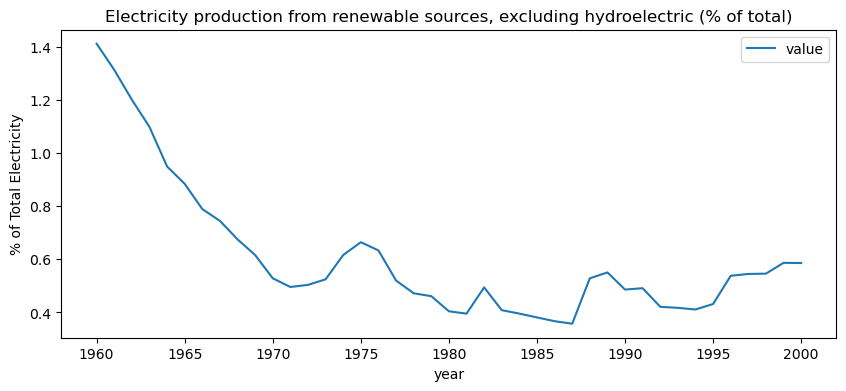

In [17]:
# what is going on between 1960 and 2000? 
# Why does it seem that the % of electricity production (from renewables) is dropping while the total kWh (from renewables) is increasing?
wb_aus_elec_zs_df[wb_aus_elec_zs_df['year'].between(1960,2000)].plot(x='year',y='value',ylabel='% of Total Electricity',figsize=(10,4),title=plot_title_percent)

<AxesSubplot:title={'center':'Electricity production from renewable sources, excluding hydroelectric (kWh)'}, xlabel='year', ylabel='Kilowatt Hours'>

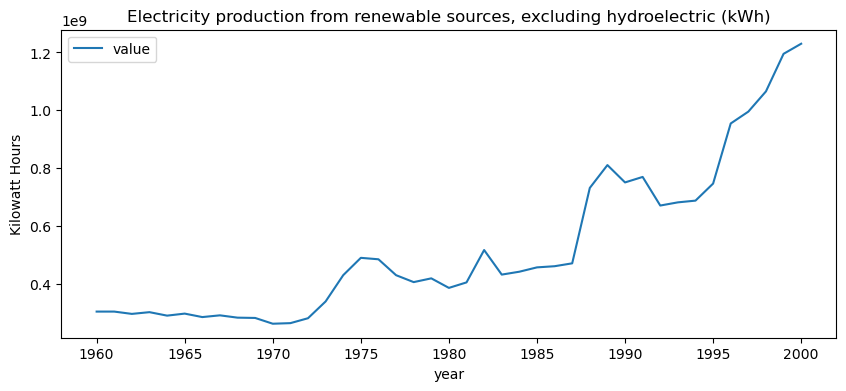

In [18]:
wb_aus_elec_kh_df[wb_aus_elec_kh_df['year'].between(1960,2000)].plot(x='year',y='value',ylabel='Kilowatt Hours',figsize=(10,4),title=plot_title_kWh)